<a href="https://colab.research.google.com/github/forbiddenvelocity/CIFAR10-image-classification-model/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog","frog","horse","ship","truck"]

In [7]:
def imgplotter(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

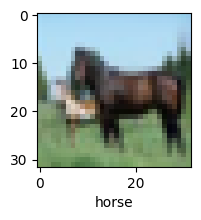

In [8]:
imgplotter(x_train, y_train, 12)

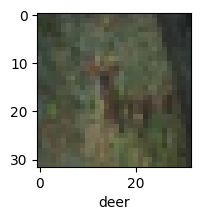

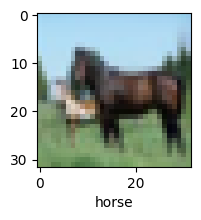

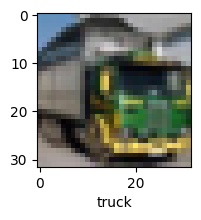

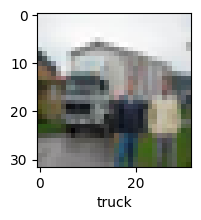

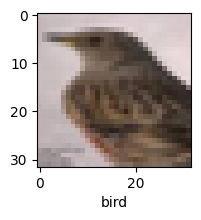

In [9]:
for i in range(10,20,2):
  imgplotter(x_train, y_train,i)

In [10]:
x_train = x_train/255
x_test = x_test/255

**Artificial Neural Network**

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8180 - accuracy: 0.3518
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6251 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5431 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4812 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4334 - accuracy: 0.4955


In [14]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


**Convolutional Neural Network**

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4566 - accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1216 - accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9889 - accuracy: 0.6536
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9027 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8273 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7687 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7168 - accuracy: 0.7518
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6667 - accuracy: 0.7682
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6242 - accuracy: 0.7813
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.58